In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy.stats as stats

In [5]:
from scipy.stats import chi2_contingency

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
df= pd.read_csv(r'C:\Users\sure_\Downloads\Mushrooms-dataset-main\Mushrooms-dataset-main\mushrooms.csv')

In [9]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [10]:
summary= df.describe().transpose()

In [11]:
summary.to_excel(r'C:\Users\sure_\OneDrive\Desktop\summary_mushroom.xlsx')

# To find the missing values in any columns

In [12]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


# To check for the duplicate rows

In [13]:
duplicates = df.duplicated()
print("Duplicate rows:")
print(df[duplicates])

Duplicate rows:
Empty DataFrame
Columns: [class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]


# Contingency table

In [14]:
contingency_table = pd.crosstab(df['cap-shape'], df['class'], margins=True)

In [15]:
contingency_table

class,e,p,All
cap-shape,,,
b,404,48,452
c,0,4,4
f,1596,1556,3152
k,228,600,828
s,32,0,32
x,1948,1708,3656
All,4208,3916,8124


In [16]:
contingency_table_proportion = pd.crosstab(df['cap-shape'], df['class'], normalize= 'index')*100

In [17]:
contingency_table_proportion

class,e,p
cap-shape,,
b,89.380531,10.619469
c,0.000000,100.000000
f,50.634518,49.365482
k,27.536232,72.463768
s,100.000000,0.000000
x,53.282276,46.717724


# Distribution of Features

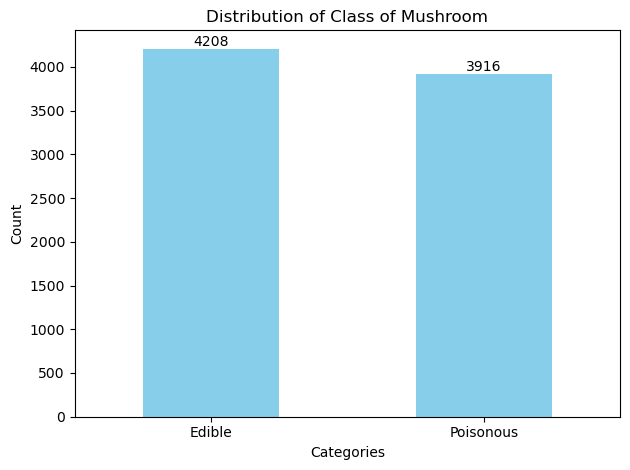

In [18]:
# Distribution of Class Mushroom
ax= df['class'].value_counts().plot(kind='bar',color= 'skyblue',legend=False)


for i, v in enumerate(df['class'].value_counts()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
# Customize the plot
ax.set_xticklabels(['Edible', 'Poisonous'], rotation=0)
plt.title('Distribution of Class of Mushroom')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.tight_layout()      

# Show the plot
plt.show()

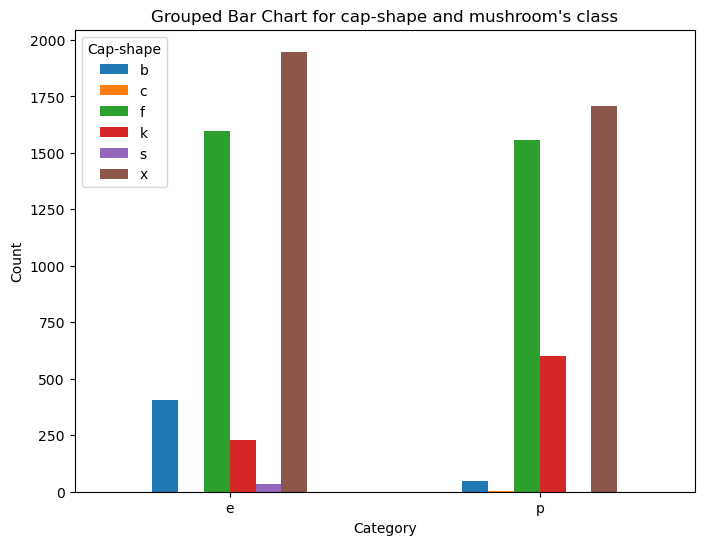

In [19]:
# Distribution of cap-shape by mushroom class
counts = df.groupby(['class', 'cap-shape']).size().unstack(fill_value=0)

# Plot grouped bar chart
counts.plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.title("Grouped Bar Chart for cap-shape and mushroom's class")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Cap-shape")
plt.xticks(rotation=0)

# Show the plot
plt.show()

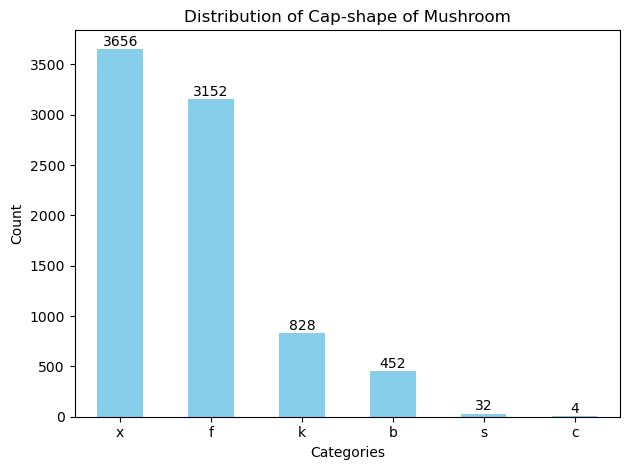

In [20]:
#Distribution of cap-shape of mushroom
ax= df['cap-shape'].value_counts().plot(kind='bar',color= 'skyblue',legend=False)


for i, v in enumerate(df['cap-shape'].value_counts()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
# Customize the plot
# ax.set_xticklabels(['Edible', 'Poisonous'], rotation=0)
plt.title('Distribution of Cap-shape of Mushroom')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.tight_layout()      

# Show the plot
plt.show()

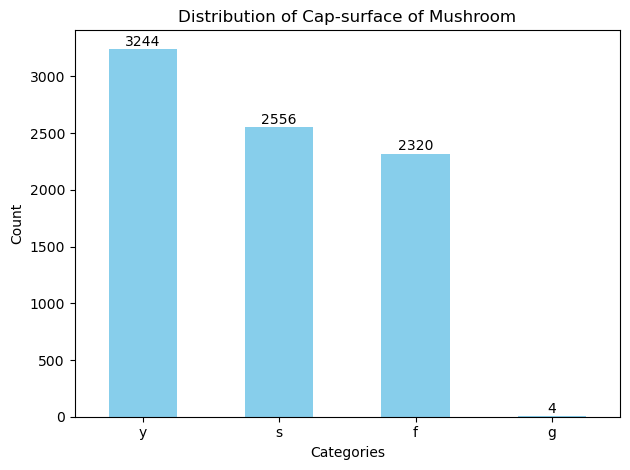

In [21]:
# Distribution of cap-surface of mushroom
ax= df['cap-surface'].value_counts().plot(kind='bar',color= 'skyblue',legend=False)


for i, v in enumerate(df['cap-surface'].value_counts()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
# Customize the plot
# ax.set_xticklabels(['Edible', 'Poisonous'], rotation=0)
plt.title('Distribution of Cap-surface of Mushroom')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.tight_layout()     

# Show the plot
plt.show()

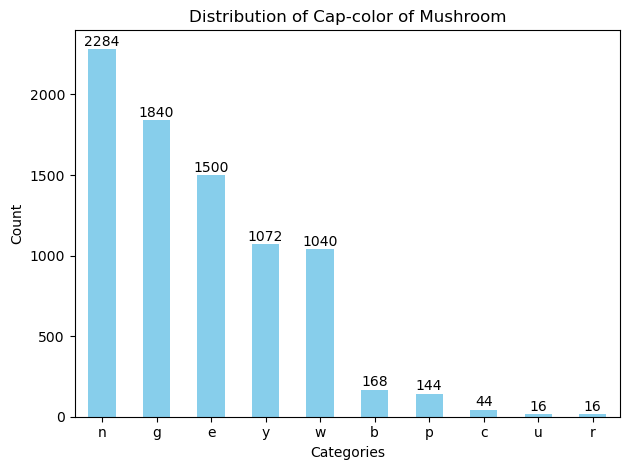

In [22]:
# Distribution of cap-color of mushroom
ax= df['cap-color'].value_counts().plot(kind='bar',color= 'skyblue',legend=False)


for i, v in enumerate(df['cap-color'].value_counts()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
# Customize the plot
# ax.set_xticklabels(['Edible', 'Poisonous'], rotation=0)
plt.title('Distribution of Cap-color of Mushroom')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.tight_layout()      

# Show the plot
plt.show()

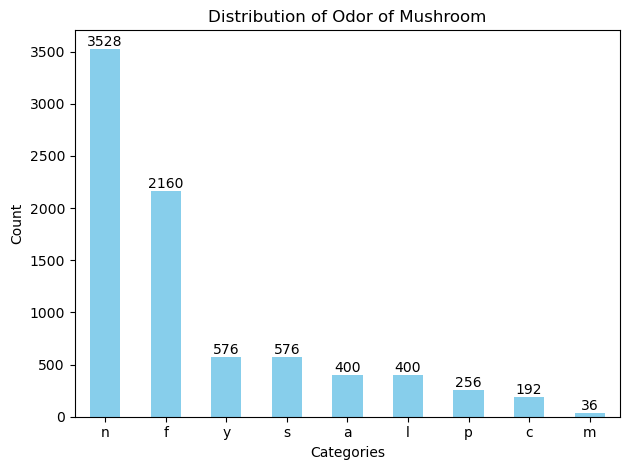

In [23]:
# Distribution of odor of mushroom
ax= df['odor'].value_counts().plot(kind='bar',color= 'skyblue',legend=False)


for i, v in enumerate(df['odor'].value_counts()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
# Customize the plot
# ax.set_xticklabels(['Edible', 'Poisonous'], rotation=0)
plt.title('Distribution of Odor of Mushroom')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.tight_layout()     

# Show the plot
plt.show()

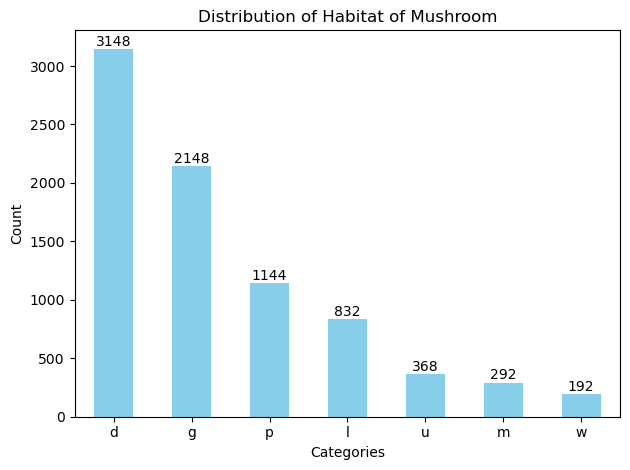

In [24]:
# Distribution of Habitat of mushroom
ax= df['habitat'].value_counts().plot(kind='bar',color= 'skyblue',legend=False)


for i, v in enumerate(df['habitat'].value_counts()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
# Customize the plot
# ax.set_xticklabels(['Edible', 'Poisonous'], rotation=0)
plt.title('Distribution of Habitat of Mushroom')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.tight_layout()      

# Show the plot
plt.show()

# Chi square test and Cramer's V to check for the association between 'mushroom class' and features.

In [25]:
# Association between mushroom class and cap-shape (chi-square and Cramer's V)
contingency_table = pd.crosstab(df['class'], df['cap-shape'])
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
rows, cols = contingency_table.shape
cramers_v = np.sqrt(chi2 / (n * (min(rows - 1, cols - 1))))

print("Contingency Table:")
print(contingency_table)
print("\nChi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("\nExpected Frequencies:")
print(expected)
print("Cramér's V:", cramers_v)

Contingency Table:
cap-shape    b  c     f    k   s     x
class                                 
e          404  0  1596  228  32  1948
p           48  4  1556  600   0  1708

Chi-square statistic: 489.9199536189558
P-value: 1.1964565685935438e-103
Degrees of freedom: 5

Expected Frequencies:
[[ 234.12309207    2.07188577 1632.6459872   428.88035451   16.57508616
  1893.70359429]
 [ 217.87690793    1.92811423 1519.3540128   399.11964549   15.42491384
  1762.29640571]]
Cramér's V: 0.24557129846865244


In [26]:
# Association between mushroom class and cap-surface (chi-square and Cramer's V)
contingency_table = pd.crosstab(df['class'], df['cap-surface'])
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()  # Total number of observations
rows, cols = contingency_table.shape
cramers_v = np.sqrt(chi2 / (n * (min(rows - 1, cols - 1))))

print("Contingency Table:")
print(contingency_table)
print("\nChi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("\nExpected Frequencies:")
print(expected)
print("Cramér's V:", cramers_v)

Contingency Table:
cap-surface     f  g     s     y
class                           
e            1560  0  1144  1504
p             760  4  1412  1740

Chi-square statistic: 315.0428312080377
P-value: 5.518427038649143e-68
Degrees of freedom: 3

Expected Frequencies:
[[1201.69374692    2.07188577 1323.93500739 1680.29935992]
 [1118.30625308    1.92811423 1232.06499261 1563.70064008]]
Cramér's V: 0.19692454173208238


In [27]:
# Association between mushroom class and cap-color (chi-square and Cramer's V)
contingency_table = pd.crosstab(df['class'], df['cap-color'])
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()  # Total number of observations
rows, cols = contingency_table.shape
cramers_v = np.sqrt(chi2 / (n * (min(rows - 1, cols - 1))))

print("Contingency Table:")
print(contingency_table)
print("\nChi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("\nExpected Frequencies:")
print(expected)
print("Cramér's V:", cramers_v)

Contingency Table:
cap-color    b   c    e     g     n   p   r   u    w    y
class                                                    
e           48  32  624  1032  1264  56  16  16  720  400
p          120  12  876   808  1020  88   0   0  320  672

Chi-square statistic: 387.5977689772298
P-value: 6.055814598336576e-78
Degrees of freedom: 9

Expected Frequencies:
[[  87.01920236   22.79074348  776.95716396  953.06745446 1183.04677499
    74.58788774    8.28754308    8.28754308  538.69030034  555.26538651]
 [  80.98079764   21.20925652  723.04283604  886.93254554 1100.95322501
    69.41211226    7.71245692    7.71245692  501.30969966  516.73461349]]
Cramér's V: 0.21842667608007765


In [28]:
# Association between mushroom class and all features (chi-square and Cramer's V)
i=1
while i< df.columns.shape [0]: 
    contingency_table = pd.crosstab(df['class'], df[df.columns[i]])
# Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()  # Total number of observations
    rows, cols = contingency_table.shape
    cramers_v = np.sqrt(chi2 / (n * (min(rows - 1, cols - 1))))

    print("Contingency Table:")
    print(contingency_table)
    print("\nChi-square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("\nExpected Frequencies:")
    print(expected)
    print("Cramér's V:", cramers_v)
    print ("--------------------------------------------------------------------------------------")
    i+=1

Contingency Table:
cap-shape    b  c     f    k   s     x
class                                 
e          404  0  1596  228  32  1948
p           48  4  1556  600   0  1708

Chi-square statistic: 489.9199536189558
P-value: 1.1964565685935438e-103
Degrees of freedom: 5

Expected Frequencies:
[[ 234.12309207    2.07188577 1632.6459872   428.88035451   16.57508616
  1893.70359429]
 [ 217.87690793    1.92811423 1519.3540128   399.11964549   15.42491384
  1762.29640571]]
Cramér's V: 0.24557129846865244
--------------------------------------------------------------------------------------
Contingency Table:
cap-surface     f  g     s     y
class                           
e            1560  0  1144  1504
p             760  4  1412  1740

Chi-square statistic: 315.0428312080377
P-value: 5.518427038649143e-68
Degrees of freedom: 3

Expected Frequencies:
[[1201.69374692    2.07188577 1323.93500739 1680.29935992]
 [1118.30625308    1.92811423 1232.06499261 1563.70064008]]
Cramér's V: 0.1969245

C:\Users\sure_\AppData\Local\Temp\ipykernel_21072\3117690098.py:10: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(rows - 1, cols - 1))))


# Logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
df= pd.get_dummies(df, columns=['class', 'cap-shape', 'cap-surface', 'cap-color', 'habitat'], drop_first=True)

In [31]:
X= df[['cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_c', 'cap-color_e',
       'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r',
       'cap-color_u', 'cap-color_w', 'cap-color_y',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w']]
y= df['class_p']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
report= classification_report(y_test, y_pred, digits=4)
print(report)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1072  185]
 [ 374  807]]
Classification Report:
              precision    recall  f1-score   support

           0     0.7414    0.8528    0.7932      1257
           1     0.8135    0.6833    0.7428      1181

    accuracy                         0.7707      2438
   macro avg     0.7774    0.7681    0.7680      2438
weighted avg     0.7763    0.7707    0.7688      2438

Accuracy Score:
0.7707136997538966


# Gaussian Naive Bayes (Categorical Naive Bayes). 

In [35]:
from sklearn.naive_bayes import CategoricalNB

In [36]:
df= pd.read_csv(r'C:\Users\sure_\Downloads\Mushrooms-dataset-main\Mushrooms-dataset-main\mushrooms.csv')

In [37]:
df= pd.get_dummies(df, columns=['class', 'cap-shape', 'cap-surface', 'cap-color', 'habitat'])

In [38]:
X= df[['cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_c', 'cap-color_e',
       'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r',
       'cap-color_u', 'cap-color_w', 'cap-color_y', 
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w']]

In [39]:
y= df['class_p']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
model = CategoricalNB()

# Train the model
model.fit(X_train, y_train)

CategoricalNB()

In [42]:
y_pred = model.predict(X_test)

In [43]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
report= classification_report(y_test, y_pred, digits=4)
print(report)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[960 297]
 [412 769]]
Classification Report:
              precision    recall  f1-score   support

           0     0.6997    0.7637    0.7303      1257
           1     0.7214    0.6511    0.6845      1181

    accuracy                         0.7092      2438
   macro avg     0.7105    0.7074    0.7074      2438
weighted avg     0.7102    0.7092    0.7081      2438

Accuracy Score:
0.7091878589007383


# Support vector classification 

In [44]:
from sklearn.svm import SVC

In [45]:
svc = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [46]:
y_pred = svc.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7592288761279737
Confusion Matrix:
[[1058  199]
 [ 388  793]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1257
           1       0.80      0.67      0.73      1181

    accuracy                           0.76      2438
   macro avg       0.77      0.76      0.76      2438
weighted avg       0.76      0.76      0.76      2438



# Support vector machine with radial basis function kernel

In [47]:
svc = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the model
svc.fit(X_train, y_train)

SVC(random_state=42)

In [48]:
y_pred = svc.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8420836751435603
Confusion Matrix:
[[1137  120]
 [ 265  916]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1257
           1       0.88      0.78      0.83      1181

    accuracy                           0.84      2438
   macro avg       0.85      0.84      0.84      2438
weighted avg       0.85      0.84      0.84      2438



# K Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
X= df[['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w']]

In [51]:
y= df['class_p']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [53]:
# Train k-NN
knn = KNeighborsClassifier(n_neighbors=90, metric='euclidean')
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

In [54]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8113207547169812
Confusion Matrix:
[[1105  152]
 [ 308  873]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1257
           1       0.85      0.74      0.79      1181

    accuracy                           0.81      2438
   macro avg       0.82      0.81      0.81      2438
weighted avg       0.82      0.81      0.81      2438



# Decision Tree 

In [55]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, plot_tree

In [56]:
# Intialize the classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)


In [57]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [58]:
y_pred = clf.predict(X_test)

In [59]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7132895816242822
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.87      0.76      1257
           1       0.79      0.55      0.65      1181

    accuracy                           0.71      2438
   macro avg       0.73      0.71      0.70      2438
weighted avg       0.73      0.71      0.71      2438



# Random Forest model

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [62]:
# Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [64]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8437243642329778
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1257
           1       0.89      0.78      0.83      1181

    accuracy                           0.84      2438
   macro avg       0.85      0.84      0.84      2438
weighted avg       0.85      0.84      0.84      2438



# XG Boost

In [65]:
df= pd.read_csv(r'C:\Users\sure_\Downloads\Mushrooms-dataset-main\Mushrooms-dataset-main\mushrooms.csv')

In [66]:
from xgboost import XGBClassifier, XGBRegressor

In [67]:
df= pd.get_dummies(df, columns=['class'])

In [68]:
X= df[['cap-shape', 'cap-surface', 'cap-color','habitat']]

In [69]:
# Converting the feature variables from 'object' type to 'category' type. 
i=0
while i < X.columns.shape[0]:
    X[X.columns [i]]= X[X.columns [i]].astype('category')
    i+=1

C:\Users\sure_\AppData\Local\Temp\ipykernel_21072\3435108846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns [i]]= X[X.columns [i]].astype('category')
C:\Users\sure_\AppData\Local\Temp\ipykernel_21072\3435108846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns [i]]= X[X.columns [i]].astype('category')
C:\Users\sure_\AppData\Local\Temp\ipykernel_21072\3435108846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [70]:
y= df['class_p']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   cap-shape    8124 non-null   category
 1   cap-surface  8124 non-null   category
 2   cap-color    8124 non-null   category
 3   habitat      8124 non-null   category
dtypes: category(4)
memory usage: 33.0 KB


In [73]:
model = XGBClassifier(enable_categorical=True, use_label_encoder=False, learning_rate = 0.1, max_depth =5, n_estimators = 100, subsample= 1.0)

In [74]:
model.fit(X_train, y_train)

C:\Users\sure_\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:48:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
y_pred= model.predict(X_test)

In [76]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8437243642329778
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1257
           1       0.88      0.79      0.83      1181

    accuracy                           0.84      2438
   macro avg       0.85      0.84      0.84      2438
weighted avg       0.85      0.84      0.84      2438

